## INTRODUCTION: EXPERIMENTATION AND UPLIFT TESTING: Task 2

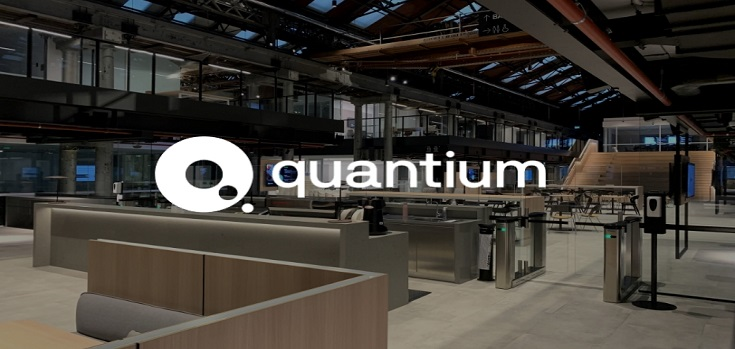

## Case Scenerio:
You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, has asked us to test the impact of the new trial layouts with a data driven recommendation to whether or not the trial layout should be rolled out to all their stores.<br>
For this part of the project we will be examining the performance in trial vs control stores to provide a recommendation for each location based on our insight. Below are some of the areas I want you to focus on, of course if you discover any other interesting insights feel free to include them in your findings.<br>

Select control stores – explore the data and define metrics for your control store selection – think about what would make them a control store. Look at the drivers and make sure you visualise these in a graph to better determine if they are suited. For this piece it may even be worth creating a function to help you.<br>

Assessment of the trial – this one should give you some interesting insights into each of the stores, check each trial store individually in comparison with the control store to get a clear view of its overall performance. We want to know if the trial stores were successful or not.<br>

Collate findings – summarise your findings for each store and provide an recommendation that we can share with Julia outlining the impact on sales during the trial period.<br>

Remember when working with a client visualisations are key to helping them understand the data.

### In Summary:
This can be broken down by:

- total sales revenue
- total number of customers
- average number of transactions per customer

Create a measure to compare different control stores to each of the trial stores to do this write a function to reduce having to re-do the analysis for each trial store. Consider using Pearson correlations or a metric such as a magnitude distance e.g. 1- (Observed distance – minimum distance)/(Maximum distance – minimum distance) as a measure.

In [1]:
#Remove Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing required libraries
import pandas as pd
import numpy as np
from scipy.stats import t 
from statistics import stdev

#Plotly Packages
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors
%matplotlib inline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

Github Doesn't allow plotly to be interactive hence the need to make it static by changing the default renderers to svg.I will be using a different method to make the visuals interactive just as plotly is through an html link.it will also be in the same github repository.

In [2]:
import plotly.io as pio
pio.renderers.default='svg'

In [3]:
df = pd.read_csv("./datasets/QVI_data.csv")

In [4]:
df.sample(5)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
229125,231042,2018-10-08,231,233853,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,KETTLE,YOUNG FAMILIES,Budget
23207,26335,2019-04-07,26,23721,68,Pringles Chicken Salt Crips 134g,2,7.4,134,PRINGLES,YOUNG FAMILIES,Premium
134883,133249,2018-12-12,133,137657,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4,150,RRD,OLDER SINGLES/COUPLES,Mainstream
214875,219219,2018-10-29,219,219309,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,150,RRD,YOUNG SINGLES/COUPLES,Budget
85402,88201,2018-10-14,88,87214,112,Tyrrells Crisps Ched & Chives 165g,2,8.4,165,TYRRELLS,YOUNG FAMILIES,Budget


In [5]:
#Getting the sum of rows and columns in the dataframe
df.shape

(264834, 12)

### Detecting Null Values And Handling it

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [7]:
df.isna().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

### Detecting Duplicates And Handling it

In [8]:
#Getting the total number of duplicates in the dataframe
df.duplicated().sum()

1

In [9]:
#Viewing the rows with duplicates,either the first or last row
df[df.duplicated(keep='first')]

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
106249,107024,2018-10-01,107,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175,SMITHS,OLDER SINGLES/COUPLES,Premium


In [10]:
#Removing the duplicates
df = df.drop_duplicates().reset_index(drop=True)

In [11]:
df.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

In [12]:
#Renaming the columns
df.rename(columns = {'LYLTY_CARD_NBR':'Loyalty_Card_Number','DATE':'Date','STORE_NBR':'Store_Number','TXN_ID':'Transaction_ID',
                       'PROD_NBR':'Product_Number','PROD_QTY':'Product_Quantity','TOT_SALES':'Total_Sales','PACK_SIZE':'Pack_Size',
                       'BRAND':'Brands','LIFESTAGE':'Life_Stage','PREMIUM_CUSTOMER':'Customer_Category'},inplace=True)

#### Augment Dataframe with additional columns From the Date Column

In [13]:
#Converting datatype to date field
df["Date"] = pd.to_datetime(df["Date"])

#Extracting the year and month from the date column to get a new column
df["Year_Month"] = df["Date"].dt.strftime("%Y%m")

#Reconverting the datatype to an integer datatype
df["Year_Month"] = pd.to_numeric(df["Year_Month"] )

The client has selected store numbers 77, 86 and 88 as trial stores and want 
control stores to be established stores that are operational for the entire 
observation period.
We would want to match trial stores to control stores that are similar to the trial
store prior to the trial period of Feb 2019 in terms of :
- Monthly overall sales revenue.
- Monthly number of customers.
- Monthly number of transactions per customer.<br>
Let's first create the metrics of interest and filter to stores that are present 
throughout the pre-trial period.<br>
Metrics to be calculated are;
- Total Sales per store for each month.
- Number of customers per store each month.
- Number of transactions per customer each month.
- Number of chips per transaction by customer in the stores per month.
- Average price per unit per store on each month

#### Generating metrics for Analysis

In [14]:
#Getting the total sales for each store number base on the year-month column
total_sales  = df.groupby(['Store_Number','Year_Month'])['Total_Sales'].sum()
total_sales 

Store_Number  Year_Month
1             201807        206.9
              201808        176.1
              201809        278.8
              201810        188.1
              201811        192.6
                            ...  
272           201902        395.5
              201903        442.3
              201904        445.1
              201905        314.6
              201906        312.1
Name: Total_Sales, Length: 3169, dtype: float64

In [15]:
#Getting the total number of customers on each store number per year_month base on unique loyalty card number
num_of_customers_store_per_month = df.groupby(['Store_Number','Year_Month'])['Loyalty_Card_Number'].nunique()
num_of_customers_store_per_month

Store_Number  Year_Month
1             201807        49
              201808        42
              201809        59
              201810        44
              201811        46
                            ..
272           201902        45
              201903        50
              201904        54
              201905        34
              201906        34
Name: Loyalty_Card_Number, Length: 3169, dtype: int64

In [16]:
#Getting the total number of transactions per customer for each store base on yearmonth
num_of_txn_customer_per_yearmonth = df.groupby(["Store_Number","Year_Month"]).Transaction_ID.nunique() / df.groupby(["Store_Number","Year_Month"]).Loyalty_Card_Number.nunique()
num_of_txn_customer_per_yearmonth

Store_Number  Year_Month
1             201807        1.061224
              201808        1.023810
              201809        1.050847
              201810        1.022727
              201811        1.021739
                              ...   
272           201902        1.066667
              201903        1.060000
              201904        1.018519
              201905        1.176471
              201906        1.088235
Length: 3169, dtype: float64

In [17]:
#Getting the total number of chips per customer for each store base on yearmonth
num_of_chips_pertxn =  df.groupby(["Store_Number","Year_Month"]).Product_Quantity.sum() / df.groupby(["Store_Number","Year_Month"]).Transaction_ID.nunique()
num_of_chips_pertxn

Store_Number  Year_Month
1             201807        1.192308
              201808        1.255814
              201809        1.209677
              201810        1.288889
              201811        1.212766
                              ...   
272           201902        1.895833
              201903        1.905660
              201904        1.909091
              201905        1.775000
              201906        1.891892
Length: 3169, dtype: float64

In [18]:
#Getting the average price per unit for each store base on yearmonth
avg_price_per_unit = df.groupby(["Store_Number","Year_Month"]).Total_Sales.sum() / df.groupby(["Store_Number","Year_Month"]).Product_Quantity.sum()
avg_price_per_unit

Store_Number  Year_Month
1             201807        3.337097
              201808        3.261111
              201809        3.717333
              201810        3.243103
              201811        3.378947
                              ...   
272           201902        4.346154
              201903        4.379208
              201904        4.239048
              201905        4.430986
              201906        4.458571
Length: 3169, dtype: float64

In [19]:
#joining all of the above metrics to form a single dataframe
metrics_df = pd.concat([total_sales,num_of_customers_store_per_month,num_of_txn_customer_per_yearmonth,
                        num_of_chips_pertxn,avg_price_per_unit],axis=1)
metrics_df.columns = ['total_sales','num_of_customers','num_of_txn_percustomer','num_of_chips_pertxn','avg_price_perUnit']
metrics_df = metrics_df.reset_index()
metrics_df.sample(5)

,Store_Number,Year_Month,total_sales,num_of_customers,num_of_txn_percustomer,num_of_chips_pertxn,avg_price_perUnit
1563,135,201905,34.4,6,1.000000,1.666667,3.440000
3026,261,201808,1131.1,119,1.184874,1.843972,4.350385
922,80,201901,1033.8,113,1.115044,1.865079,4.399149
568,50,201808,292.4,53,1.056604,1.535714,3.400000
1626,141,201808,225.3,31,1.064516,1.606061,4.250943


In [20]:
#Filtering to get only the stores with full observation periods 
months = metrics_df.groupby('Store_Number').Year_Month.nunique().reset_index()
fullperiod_stores = months[months.Year_Month == 12].Store_Number

pretrial = metrics_df[metrics_df['Store_Number'].isin(fullperiod_stores)]

#Refiltering to keep only the pre-trial period data
pretrial = pretrial.loc[pretrial.Year_Month < 201902]
pretrial

,Store_Number,Year_Month,total_sales,num_of_customers,num_of_txn_percustomer,num_of_chips_pertxn,avg_price_perUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,1.972222,4.291549
3160,272,201810,430.6,44,1.136364,1.980000,4.349495
3161,272,201811,376.2,41,1.097561,1.933333,4.324138
3162,272,201812,403.9,47,1.000000,1.893617,4.538202


A way to rank how similar each potential control store is to the trial store. We can calculate how correlated the performance of each control store is to the trial store. Hence a function is written for this so that we don't have to calculate this for each trial store and control store pair.

In [21]:
def cal_corr(metric_col,trial_store,df=pretrial):
  output = pd.DataFrame({"trial_store":[],"control_store":[],"Correlation":[]})
  trial_num = df[df["Store_Number"]==trial_store][metric_col].reset_index(drop=True)
  storeNumbers = df["Store_Number"].unique()
  for i in storeNumbers:
    store_num = df[df["Store_Number"]==i][metric_col].reset_index(drop=True)
    output = output.append({"trial_store": trial_store, "control_store":i,"Correlation":store_num.corr(trial_num)},ignore_index=True)
  return output

Apart from correlation, a standardised metric can also be calculated based on the absolute difference between the trial store's performance and each control store's performance. Hence a function was written to calculate the magnitude between a trial store and control stores magnitude distance e.g.<br>
1 - (Observed distance – minimum distance) / (Maximum distance – minimum distance)

In [22]:
def cal_mag_dist(metric_col, trial_store,df=pretrial):
  output = pd.DataFrame({"trial_Store":[],"control_store":[],"Magnitude":[]})
  trial_num = df[df['Store_Number'] == trial_store][metric_col].reset_index(drop=True)
  storeNumbers = df["Store_Number"].unique()
  for i in storeNumbers:
    store_num = df[df["Store_Number"] == i][metric_col].reset_index(drop=True)
    standardized = abs(trial_num-store_num)
    magnitude = np.mean(1-(standardized-min(standardized)) / (max(standardized)-min(standardized)))
    output = output.append({'trial_Store': trial_store, 'control_store': i, 'Magnitude': magnitude}, ignore_index = True)
  return output

## TRIAL STORE 77 AND CONTROL STORES

The functions above will be used to find the control stores. Control stores are to be selected based on how similar monthly total sales in dollar amounts and monthly number of customers are to the trial stores. Hence the functions will be used to get four
scores, two for each of total sales and total customers.

#### TOTAL SALES

In [23]:
#Getting Correlation
trial_store = 77
total_sales_corr = cal_corr("total_sales", trial_store)
num_of_customers = cal_corr('num_of_customers',  trial_store)

total_sales_mag = cal_mag_dist("total_sales", trial_store)
num_of_customers_mag = cal_mag_dist("num_of_customers", trial_store)

In [24]:
total_sales_corr.head()

,trial_store,control_store,Correlation
0,77.0,1.0,0.075218
1,77.0,2.0,-0.263079
2,77.0,3.0,0.806644
3,77.0,4.0,-0.263300
4,77.0,5.0,-0.110652


In [25]:
total_sales_mag.head()

,trial_Store,control_store,Magnitude
0,77.0,1.0,0.408163
1,77.0,2.0,0.590119
2,77.0,3.0,0.522914
3,77.0,4.0,0.644934
4,77.0,5.0,0.516320


Taking a simple average of the correlation and magnitude scores for each driver. If it is more important for the trend of the drivers to be similar, we can increase the weight of the correlation score (a simple average 
gives a weight of 0.5 to the corr_weight) or if we consider the absolute size of the drivers to be more important, we can lower the weight of the correlation score.

In [26]:
#Concatenating the scores together for total_sales
total_sales_score = pd.concat([total_sales_corr, total_sales_mag['Magnitude']], axis = 1)
total_sales_score

,trial_store,control_store,Correlation,Magnitude
0,77.0,1.0,0.075218,0.408163
1,77.0,2.0,-0.263079,0.590119
2,77.0,3.0,0.806644,0.522914
3,77.0,4.0,-0.263300,0.644934
4,77.0,5.0,-0.110652,0.516320
...,...,...,...,...
255,77.0,268.0,0.344757,0.429787
256,77.0,269.0,-0.315730,0.559099
257,77.0,270.0,0.315430,0.591547
258,77.0,271.0,0.355487,0.341091


In [27]:
#Adding correlated average weight 
corr_weight = 0.5
total_sales_score['total_sales_score'] = corr_weight * total_sales_score['Correlation'] + (1 - corr_weight) * total_sales_score['Magnitude']
total_sales_score.head()

,trial_store,control_store,Correlation,Magnitude,total_sales_score
0,77.0,1.0,0.075218,0.408163,0.241691
1,77.0,2.0,-0.263079,0.590119,0.163520
2,77.0,3.0,0.806644,0.522914,0.664779
3,77.0,4.0,-0.263300,0.644934,0.190817
4,77.0,5.0,-0.110652,0.516320,0.202834


#### NUMBER OF CUSTOMERS

In [28]:
num_of_customers_score = pd.concat([num_of_customers, num_of_customers_mag['Magnitude']], axis = 1)
num_of_customers_score.sample(5)

,trial_store,control_store,Correlation,Magnitude
169,77.0,177.0,-0.288886,0.480519
93,77.0,100.0,0.406821,0.422857
179,77.0,187.0,0.472194,0.469388
30,77.0,33.0,0.747894,0.542857
146,77.0,154.0,-0.080580,0.343629


In [29]:
#Adding a new column for weighted average
num_of_customers_score['num_of_customers_score'] = corr_weight * num_of_customers_score['Correlation'] + (1 - corr_weight) * num_of_customers_score['Magnitude']
num_of_customers_score.head()

,trial_store,control_store,Correlation,Magnitude,num_of_customers_score
0,77.0,1.0,0.322168,0.663866,0.493017
1,77.0,2.0,-0.572051,0.471429,-0.050311
2,77.0,3.0,0.834207,0.489796,0.662002
3,77.0,4.0,-0.295639,0.498258,0.101310
4,77.0,5.0,0.370659,0.512605,0.441632


After getting scores for each of total number of sales and number of customers. The two were then combined via a simple average, to form a single table.<br>
Combine scores across the drivers by first merging our sales scores and customer scores into a single table

In [30]:
#Setting index both for total sales score and num of customers scores
total_sales_score.set_index(['trial_store', 'control_store'], inplace = True)
num_of_customers_score.set_index(['trial_store', 'control_store'], inplace = True)

In [31]:
control_score = pd.concat([total_sales_score['total_sales_score'], num_of_customers_score['num_of_customers_score']], axis = 1)
control_score

total_sales_score  num_of_customers_score
trial_store control_store                                           
77.0        1.0                     0.241691                0.493017
            2.0                     0.163520               -0.050311
            3.0                     0.664779                0.662002
            4.0                     0.190817                0.101310
            5.0                     0.202834                0.441632
...                                      ...                     ...
            268.0                   0.387272                0.470473
            269.0                   0.121684                0.005090
            270.0                   0.453489                0.202710
            271.0                   0.348289                0.174100
            272.0                   0.320626                0.384336

[260 rows x 2 columns]

In [32]:
#Getting a new column to score control which computes the average of score and sales and score and customers
control_score['control_score_final'] = 0.5 * (control_score['total_sales_score'] + control_score['num_of_customers_score'])
control_score.head()

total_sales_score  num_of_customers_score  \
trial_store control_store                                              
77.0        1.0                     0.241691                0.493017   
            2.0                     0.163520               -0.050311   
            3.0                     0.664779                0.662002   
            4.0                     0.190817                0.101310   
            5.0                     0.202834                0.441632   

                           control_score_final  
trial_store control_store                       
77.0        1.0                       0.367354  
            2.0                       0.056604  
            3.0                       0.663390  
            4.0                       0.146064  
            5.0                       0.322233

The store with the highest score is then selected as the control store since it is 
most similar to the trial store.<br>
Select control stores based on the highest matching store (closest to 1 but not the store itself, i.e. the second ranked highest store)

In [33]:
#Getting the top 5 stores with highest control score final
final_control_store_top5 = control_score.sort_values("control_score_final",ascending=False)
final_control_store_top5.head()

total_sales_score  num_of_customers_score  \
trial_store control_store                                              
77.0        233.0                   0.697290                0.816607   
            71.0                    0.789497                0.663123   
            84.0                    0.656972                0.715000   
            119.0                   0.636046                0.729729   
            115.0                   0.708347                0.645155   

                           control_score_final  
trial_store control_store                       
77.0        233.0                     0.756949  
            71.0                      0.726310  
            84.0                      0.685986  
            119.0                     0.682887  
            115.0                     0.676751

In [34]:
#Segregating stores into three types, control_store, trial_store and other types
sales_df = pretrial
control_Store = 233
store_type = []
options = {trial_store: "Trials",control_Store: "Control", }

for i in sales_df["Store_Number"]:
    the_thing = options.get(i, "Others")
    store_type.append(the_thing)

sales_df["store_type"] = store_type
sales_df.head()

,Store_Number,Year_Month,total_sales,num_of_customers,num_of_txn_percustomer,num_of_chips_pertxn,avg_price_perUnit,store_type
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Others
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Others
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Others
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Others
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Others


In [35]:
#Getting the unique stores in the column
sales_df["store_type"].unique()

array(['Others', 'Trials', 'Control'], dtype=object)

In [36]:
#Getting the datatype
sales_df['Year_Month'].dtype

dtype('int64')

In [37]:
#Changing Year_Month to datetime datatype and attaching it to a new column
sales_df["month_plot"] = pd.to_datetime(sales_df["Year_Month"].astype(str), format = '%Y%m')
sales_df.sample(5)

,Store_Number,Year_Month,total_sales,num_of_customers,num_of_txn_percustomer,num_of_chips_pertxn,avg_price_perUnit,store_type,month_plot
2270,195,201901,153.3,33,1.030303,1.411765,3.193750,Others,2019-01-01
2147,184,201901,913.4,93,1.376344,2.000000,3.567969,Others,2019-01-01
1243,109,201808,828.3,89,1.325843,1.906780,3.681333,Others,2018-08-01
2629,227,201809,779.0,97,1.164948,2.035398,3.386957,Others,2018-09-01
76,7,201811,1076.5,111,1.162162,1.922481,4.340726,Others,2018-11-01


Next is visualizing the drivers to see if the drivers are indeed similar in the period before the trial.

In [38]:
def plot_creation(df,metric_col,control_stores,trial_stores,other_stores):
  control_sales_plot = df.loc[df["store_type"]==control_stores,["month_plot",metric_col]]
  control_sales_plot.set_index("month_plot",inplace=True)
  control_sales_plot.rename(columns={metric_col:control_stores},inplace=True)
  
  trial_sales_plot = df.loc[df["store_type"]==trial_stores,["month_plot",metric_col]]
  trial_sales_plot.set_index("month_plot",inplace=True)
  trial_sales_plot.rename(columns={metric_col:trial_stores},inplace=True)

   
  other_sales_plot = df.loc[df["store_type"]==other_stores,["month_plot",metric_col]]
  other_sales_plot =pd.DataFrame(other_sales_plot.groupby("month_plot")[metric_col].mean())
  other_sales_plot.rename(columns = {metric_col:other_stores}, inplace = True)

  sales_plot_combined = pd.concat([control_sales_plot,trial_sales_plot,other_sales_plot],axis=1)
  return sales_plot_combined

#### TOTAL SALES PER MONTH OF EACH STORE TYPE

In [39]:
#Creating plot table from the above function base on total sales of each store type by month
total_sales = plot_creation(sales_df,"total_sales","Control","Trials","Others").reset_index()
total_sales

,month_plot,Control,Trials,Others
0,2018-07-01,290.7,296.8,638.004651
1,2018-08-01,285.9,255.5,610.223450
2,2018-09-01,228.6,225.2,620.198450
3,2018-10-01,185.7,204.5,635.291473
4,2018-11-01,211.6,245.3,618.864341
5,2018-12-01,279.8,267.3,648.453876
6,2019-01-01,177.5,204.4,628.684496


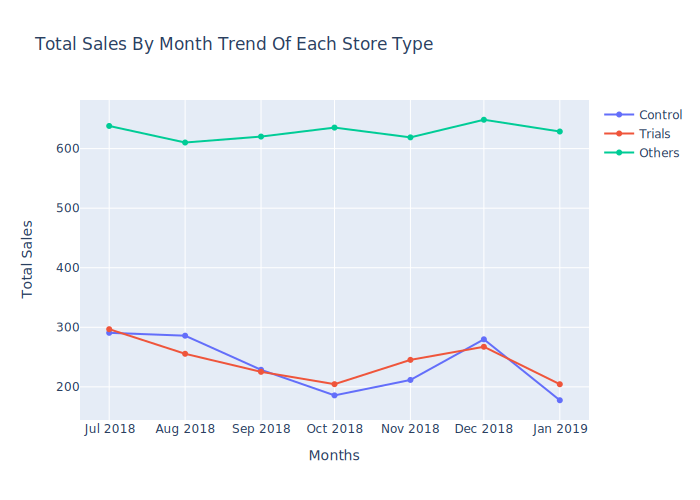

In [40]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=total_sales.month_plot,y=total_sales.Control,mode='lines+markers',name='Control'))
fig.add_trace(go.Scatter(x=total_sales.month_plot,y=total_sales.Trials,mode='lines+markers',name='Trials'))
fig.add_trace(go.Scatter(x=total_sales.month_plot,y=total_sales.Others,mode='lines+markers',name='Others'))

fig.update_layout(title='Total Sales By Month Trend Of Each Store Type',
                  yaxis_title='Total Sales',xaxis_title='Months')

#### NUMBER OF CUSTOMERS PER MONTH ON EACH STORE TYPE

In [41]:
#Creating plot table from the above function base on the number of customers for each store type by month
num_of_customers = plot_creation(sales_df,"num_of_customers","Control","Trials","Others").reset_index()
num_of_customers

,month_plot,Control,Trials,Others
0,2018-07-01,51,51,72.333333
1,2018-08-01,48,47,72.120155
2,2018-09-01,42,42,70.131783
3,2018-10-01,35,37,71.608527
4,2018-11-01,40,41,70.534884
5,2018-12-01,47,46,73.515504
6,2019-01-01,35,35,71.240310


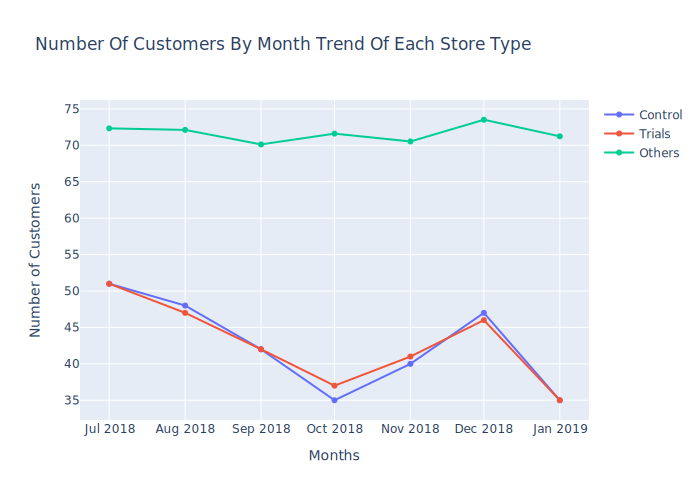

In [42]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=num_of_customers.month_plot,y=num_of_customers.Control,mode='lines+markers',name='Control'))
fig.add_trace(go.Scatter(x=num_of_customers.month_plot,y=num_of_customers.Trials,mode='lines+markers',name='Trials'))
fig.add_trace(go.Scatter(x=num_of_customers.month_plot,y=num_of_customers.Others,mode='lines+markers',name='Others'))

fig.update_layout(title='Number Of Customers By Month Trend Of Each Store Type',
                  yaxis_title='Number of Customers',xaxis_title='Months')

The trial period goes from the start of February 2019 to April 2019. We now want to see if there has been an uplift in overall chip sales. We'll start with scaling the control store's sales to a level similar to control for any differences between the two stores outside of the trial period. 

In [43]:
pretrial.head()

,Store_Number,Year_Month,total_sales,num_of_customers,num_of_txn_percustomer,num_of_chips_pertxn,avg_price_perUnit,store_type,month_plot
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Others,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Others,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Others,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Others,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Others,2018-11-01


In [44]:
# Scaling pre-trial control sales to match pre-trial trial store sales 
def scale(metric_col,df=pretrial):
  trial_store_sum = df.loc[df["store_type"] == "Trial Stores", metric_col].sum()
  control_store_sum = df.loc[df["store_type"] == "Control Stores", metric_col].sum()
  scale_factors = trial_store_sum / control_store_sum
  return scale_factors

#### HYPOTHESIS TESTING

Null Hypothesis of this experiment is that the trial period is the same as the pre-trial period. Alternative Hypothesis of this experiment is that the trial period is not the same as the pre-trial period. We test through checking the standard deviation

Now that we have comparable sales figures for the control stores, we can calculate the percentage difference between the scaled control sales and the trial store's sales during the trial period.<br>
Note that there are 8 months in the pre-trial period hence 8 - 1 = 7 degrees of freedom.<br>
Hence Calculate the t-values for the trial months. After that, find the 95th percentile of the t distribution with the appropriate degrees of freedom.

In [45]:
def concat_sales_factor(sales_df,metric_col,current_df=metrics_df):
  trial_store_sum = sales_df[sales_df["store_type"]=="Trials"][metric_col].sum()
  control_store_sum = sales_df[sales_df["store_type"]=="Control"][metric_col].sum()
    
#Scaling to compare with control store
  scaling_factor = trial_store_sum / control_store_sum
  current_df['Month_Plot'] = pd.to_datetime(metrics_df['Year_Month'].astype(str), format = '%Y%m')
  control_sales_scale = current_df
  control_sales_scale = control_sales_scale.loc[control_sales_scale['Store_Number'] == control_Store]
  control_sales_scale['controlSales'] = control_sales_scale[metric_col] * scaling_factor

  percent_diff = control_sales_scale[['Year_Month', 'controlSales']]
  percent_diff.reset_index(drop = True, inplace = True)

#Concatenating with trial store number of customers
  trial_cust = metrics_df.loc[metrics_df['Store_Number'] == trial_store, metric_col]
  trial_cust.reset_index(drop = True, inplace = True)
  percent_diff = pd.concat([percent_diff, trial_cust], axis = 1)
  percent_diff.rename(columns={metric_col:"trialSales"},inplace=True)

#Calculating the percentage difference and put it in a new column
  percent_diff['percent_diff'] = abs(percent_diff.controlSales - percent_diff.trialSales) / percent_diff.controlSales
  scaled = (control_sales_scale,percent_diff)
  return scaled

In [46]:
#Applying Function
control_sales_scale,percent_diff = concat_sales_factor(pretrial,"total_sales")
control_sales_scale.head()

,Store_Number,Year_Month,total_sales,num_of_customers,num_of_txn_percustomer,num_of_chips_pertxn,avg_price_perUnit,Month_Plot,controlSales
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,2018-07-01,297.565550
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,2018-08-01,292.652187
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,2018-09-01,233.998916
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,2018-10-01,190.085733
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,2018-11-01,216.597421


In [47]:
percent_diff.head()

,Year_Month,controlSales,trialSales,percent_diff
0,201807,297.565550,296.8,0.002573
1,201808,292.652187,255.5,0.126950
2,201809,233.998916,225.2,0.037602
3,201810,190.085733,204.5,0.075830
4,201811,216.597421,245.3,0.132516


In [48]:
#Getting the 95% of the t-distribution
print(f"The 95% percentile of the t-distribution is {t.ppf(1-0.05,7)}")

The 95% percentile of the t-distribution is 1.894578605061305


In [49]:
std_dev = stdev(percent_diff.loc[percent_diff['Year_Month'] < 201902, 'percent_diff'])
std_dev

0.04994076264142537

Testing with a null hypothesis of there being 0 difference between trial and control stores.Note that there are 8 months in the pre-trial period hence 8 - 1 = 7 degrees of freedom.

In [50]:
#Creating a new column for 'tValue'
#Trial period start from february 2019 to april 2019
#Samples = 7
degree_of_freedom = 6 
percent_diff['t_value'] = (percent_diff['percent_diff'] - 0) / std_dev
percent_diff.loc[(percent_diff['Year_Month'] > 201901) & (percent_diff['Year_Month'] < 201905), ['Year_Month','t_value']]

,Year_Month,t_value
7,201902,1.183534
8,201903,7.339116
9,201904,12.476373


It can be seen that the t-value is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.

Plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the 
control store.

In [51]:
def scale_plot(df,month,metric_col):
  df[month] = pd.to_datetime(df["Year_Month"].astype(str), format = '%Y%m')
  df = df.loc[:, [month, metric_col]]
  df.set_index(month,inplace=True)
  return df 

In [52]:
#Control store sales
control_store_sales = scale_plot(control_sales_scale,"month_plot","controlSales")
control_store_sales.rename(columns={"controlSales": "control_sales"},inplace=True)
control_store_sales

,control_sales
month_plot,
2018-07-01,297.565550
2018-08-01,292.652187
2018-09-01,233.998916
2018-10-01,190.085733
2018-11-01,216.597421
2018-12-01,286.408121
2019-01-01,181.692071
2019-02-01,249.762622
2019-03-01,203.802205


In [53]:
#Trial store sales
trial_store_sales = metrics_df[metrics_df["Store_Number"] == trial_store] 
trial_store_sales = scale_plot(trial_store_sales,"month_plot","total_sales")
trial_store_sales.rename(columns={"total_sales":"trial_sales"},inplace=True)
trial_store_sales

,trial_sales
month_plot,
2018-07-01,296.8
2018-08-01,255.5
2018-09-01,225.2
2018-10-01,204.5
2018-11-01,245.3
2018-12-01,267.3
2019-01-01,204.4
2019-02-01,235.0
2019-03-01,278.5


In [54]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval
control_store_sales['control_5percent_confidence_Interval'] = control_store_sales['control_sales'] * (1 - std_dev*2)
control_store_sales['control_95percent_confidence_Interval'] = control_store_sales['control_sales'] * (1 + std_dev*2)
control_store_sales

,control_sales,control_5percent_confidence_Interval,control_95percent_confidence_Interval
month_plot,,,
2018-07-01,297.565550,267.844249,327.286851
2018-08-01,292.652187,263.421640,321.882734
2018-09-01,233.998916,210.626747,257.371084
2018-10-01,190.085733,171.099680,209.071786
2018-11-01,216.597421,194.963341,238.231502
2018-12-01,286.408121,257.801241,315.015001
2019-01-01,181.692071,163.544390,199.839753
2019-02-01,249.762622,224.815950,274.709294
2019-03-01,203.802205,183.446130,224.158280


In [55]:
control_and_trial_sales = pd.merge(control_store_sales,trial_store_sales,left_index=True,right_index=True).reset_index()
control_and_trial_sales

,month_plot,control_sales,control_5percent_confidence_Interval,control_95percent_confidence_Interval,trial_sales
0,2018-07-01,297.565550,267.844249,327.286851,296.8
1,2018-08-01,292.652187,263.421640,321.882734,255.5
2,2018-09-01,233.998916,210.626747,257.371084,225.2
3,2018-10-01,190.085733,171.099680,209.071786,204.5
4,2018-11-01,216.597421,194.963341,238.231502,245.3
5,2018-12-01,286.408121,257.801241,315.015001,267.3
6,2019-01-01,181.692071,163.544390,199.839753,204.4
7,2019-02-01,249.762622,224.815950,274.709294,235.0
8,2019-03-01,203.802205,183.446130,224.158280,278.5
9,2019-04-01,162.345704,146.130368,178.561041,263.5


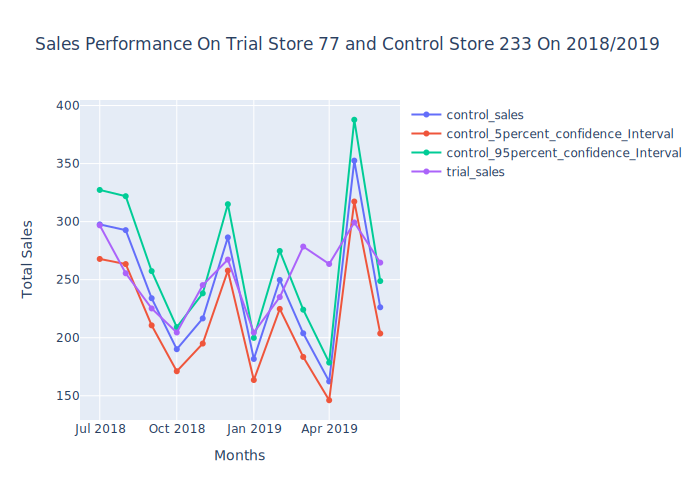

In [56]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=control_and_trial_sales.month_plot,y=control_and_trial_sales.control_sales,mode='lines+markers',name='control_sales'))
fig.add_trace(go.Scatter(x=control_and_trial_sales.month_plot,y=control_and_trial_sales.control_5percent_confidence_Interval,mode='lines+markers',name='control_5percent_confidence_Interval'))
fig.add_trace(go.Scatter(x=control_and_trial_sales.month_plot,y=control_and_trial_sales.control_95percent_confidence_Interval,mode='lines+markers',name='control_95percent_confidence_Interval'))
fig.add_trace(go.Scatter(x=control_and_trial_sales.month_plot,y=control_and_trial_sales.trial_sales,mode='lines+markers',name='trial_sales'))

fig.update_layout(title= f'Sales Performance On Trial Store {trial_store} and Control Store {control_Store} On 2018/2019',
                  yaxis_title='Total Sales',xaxis_title='Months')

The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial 
months.
The graph implies that the increase in sales in the trial store 77 in March and April is statistically greater than in the control store. The trial store performance lies outdside the 5% and 95% confidence interval.

#### FOR NUMBER OF CUSTOMERS

In [57]:
trial_store_sum = pretrial[pretrial["store_type"]=="Trials"]["num_of_customers"].sum()
control_store_sum = pretrial[pretrial["store_type"]=="Control"]["num_of_customers"].sum()

#Scalling in comparison with control store
scaling_factor = trial_store_sum / control_store_sum
metrics_df['month_plot'] = pd.to_datetime(metrics_df['Year_Month'].astype(str), format = '%Y%m')

customer_control_scaled = metrics_df
customer_control_scaled = customer_control_scaled.loc[customer_control_scaled['Store_Number'] == control_Store]
customer_control_scaled['control_customers'] = customer_control_scaled['num_of_customers'] * scaling_factor
customer_control_scaled.head()

,Store_Number,Year_Month,total_sales,num_of_customers,num_of_txn_percustomer,num_of_chips_pertxn,avg_price_perUnit,Month_Plot,month_plot,control_customers
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,2018-07-01,2018-07-01,51.171141
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,2018-08-01,2018-08-01,48.161074
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,2018-09-01,2018-09-01,42.140940
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,2018-10-01,2018-10-01,35.117450
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,2018-11-01,2018-11-01,40.134228


In [58]:
def concat_customer_factor(df,metric_col,current_df=metrics_df):
  trial_store_sum = df[df["store_type"] == "Trials"][metric_col].sum()
  control_store_sum = df[df["store_type"] == "Control"][metric_col].sum()
    
#Scaling to compare with control store
  scaling_factor = trial_store_sum / control_store_sum
  current_df['month_plot'] = pd.to_datetime(metrics_df['Year_Month'].astype(str), format = '%Y%m')
  control_cust_scaled = current_df
  control_cust_scaled = control_cust_scaled.loc[control_cust_scaled['Store_Number'] == control_Store]
  control_cust_scaled['control_customers'] = control_cust_scaled['num_of_customers'] * scaling_factor

  percent_diff = control_cust_scaled[['Year_Month', 'control_customers']]
  percent_diff.reset_index(drop = True, inplace = True)

#Concatenating with trial store number of customers
  trial_customers = metrics_df.loc[metrics_df['Store_Number'] == trial_store, 'num_of_customers']
  trial_customers.reset_index(drop = True, inplace = True)
  percent_diff = pd.concat([percent_diff, trial_customers], axis = 1)
  percent_diff.rename(columns={"num_of_customers":"num_of_trial_customerst"},inplace=True)

  # Calculate percentage difference and put it in a new column
  percent_diff['percent_diff'] = abs(percent_diff.control_customers - percent_diff.num_of_trial_customerst) / percent_diff.control_customers
  scaled = (control_cust_scaled,percent_diff)
  return scaled

In [59]:
#Applying Function
control_cust_scaled,percent_diff = concat_customer_factor(pretrial,"num_of_customers")

In [60]:
percent_diff.head()

,Year_Month,control_customers,num_of_trial_customerst,percent_diff
0,201807,51.171141,51,0.003344
1,201808,48.161074,47,0.024108
2,201809,42.140940,42,0.003344
3,201810,35.117450,37,0.053607
4,201811,40.134228,41,0.021572


In [61]:
std_dev = stdev(percent_diff.loc[percent_diff['Year_Month'] < 201902, 'percent_diff'])
std_dev

0.018240748558243945

In [62]:
percent_diff['t_value'] = (percent_diff['percent_diff'] - 0) / std_dev
percent_diff.loc[(percent_diff['Year_Month'] > 201901) & (percent_diff['Year_Month'] < 201905), ['Year_Month','t_value']]

,Year_Month,t_value
7,201902,0.183352
8,201903,13.476388
9,201904,30.778725


In [63]:
degree_of_freedom = 6
t.ppf(1-0.05, degree_of_freedom)

1.9431802803927816

In [64]:
control_customers = scale_plot(control_cust_scaled,"month_plot","control_customers")
control_customers

,control_customers
month_plot,
2018-07-01,51.171141
2018-08-01,48.161074
2018-09-01,42.140940
2018-10-01,35.117450
2018-11-01,40.134228
2018-12-01,47.157718
2019-01-01,35.117450
2019-02-01,45.151007
2019-03-01,40.134228


In [65]:
trial_customers = metrics_df.loc[metrics_df["Store_Number"] == trial_store]
trial_customers = scale_plot(trial_customers,"month_plot","num_of_customers")
trial_customers.rename(columns={"num_of_customers": "trial_customers"},inplace=True)
trial_customers

,trial_customers
month_plot,
2018-07-01,51
2018-08-01,47
2018-09-01,42
2018-10-01,37
2018-11-01,41
2018-12-01,46
2019-01-01,35
2019-02-01,45
2019-03-01,50


In [66]:
control_customers['control_5percent_confidence_Interval'] = control_customers['control_customers'] * (1 - std_dev * 2)
control_customers['control_95percent_confidence_Interval'] = control_customers['control_customers'] * (1 + std_dev * 2)
control_customers

,control_customers,control_5percent_confidence_Interval,control_95percent_confidence_Interval
month_plot,,,
2018-07-01,51.171141,49.304341,53.037941
2018-08-01,48.161074,46.404086,49.918062
2018-09-01,42.140940,40.603575,43.678304
2018-10-01,35.117450,33.836313,36.398587
2018-11-01,40.134228,38.670071,41.598385
2018-12-01,47.157718,45.437334,48.878102
2019-01-01,35.117450,33.836313,36.398587
2019-02-01,45.151007,43.503830,46.798183
2019-03-01,40.134228,38.670071,41.598385


In [67]:
control_and_trial_customers = pd.merge(control_customers,trial_customers,left_index = True, right_index = True).reset_index()
control_and_trial_customers

,month_plot,control_customers,control_5percent_confidence_Interval,control_95percent_confidence_Interval,trial_customers
0,2018-07-01,51.171141,49.304341,53.037941,51
1,2018-08-01,48.161074,46.404086,49.918062,47
2,2018-09-01,42.140940,40.603575,43.678304,42
3,2018-10-01,35.117450,33.836313,36.398587,37
4,2018-11-01,40.134228,38.670071,41.598385,41
5,2018-12-01,47.157718,45.437334,48.878102,46
6,2019-01-01,35.117450,33.836313,36.398587,35
7,2019-02-01,45.151007,43.503830,46.798183,45
8,2019-03-01,40.134228,38.670071,41.598385,50
9,2019-04-01,30.100671,29.002554,31.198789,47


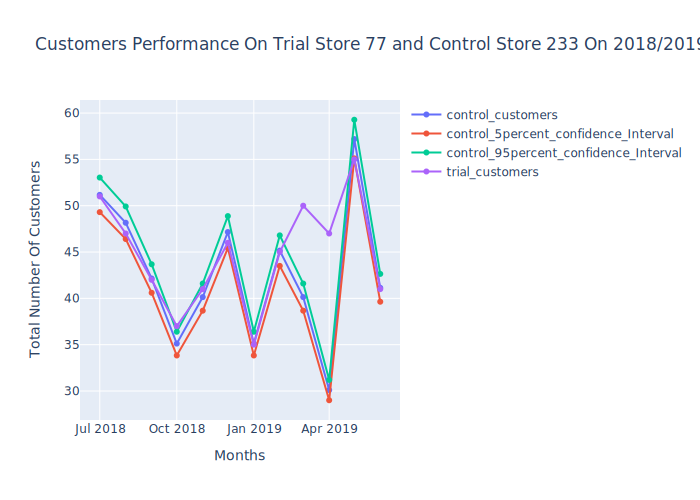

In [68]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=control_and_trial_customers.month_plot,y=control_and_trial_customers.control_customers,mode='lines+markers',name='control_customers'))
fig.add_trace(go.Scatter(x=control_and_trial_customers.month_plot,y=control_and_trial_customers.control_5percent_confidence_Interval,mode='lines+markers',name='control_5percent_confidence_Interval'))
fig.add_trace(go.Scatter(x=control_and_trial_customers.month_plot,y=control_and_trial_customers.control_95percent_confidence_Interval,mode='lines+markers',name='control_95percent_confidence_Interval'))
fig.add_trace(go.Scatter(x=control_and_trial_customers.month_plot,y=control_and_trial_customers.trial_customers,mode='lines+markers',name='trial_customers'))

fig.update_layout(title= f'Customers Performance On Trial Store {trial_store} and Control Store {control_Store} On 2018/2019',
                  yaxis_title='Total Number Of Customers',xaxis_title='Months')

## TRIAL STORE 86 AND CONTROL STORE

In [69]:
#Getting Correlation
trial_store = 86
total_sales_corr = cal_corr("total_sales", trial_store)
num_of_customers = cal_corr('num_of_customers',  trial_store)

total_sales_mag = cal_mag_dist("total_sales", trial_store)
num_of_customers_mag = cal_mag_dist("num_of_customers", trial_store)

In [70]:
total_sales_corr.head()

,trial_store,control_store,Correlation
0,86.0,1.0,0.445632
1,86.0,2.0,-0.403835
2,86.0,3.0,-0.261284
3,86.0,4.0,-0.039035
4,86.0,5.0,0.235159


In [71]:
total_sales_mag.head()

,trial_Store,control_store,Magnitude
0,86.0,1.0,0.488334
1,86.0,2.0,0.321131
2,86.0,3.0,0.507515
3,86.0,4.0,0.635654
4,86.0,5.0,0.579835


In [72]:
#Concatenating the scores together for total_sales
total_sales_score = pd.concat([total_sales_corr, total_sales_mag['Magnitude']], axis = 1)
total_sales_score

,trial_store,control_store,Correlation,Magnitude
0,86.0,1.0,0.445632,0.488334
1,86.0,2.0,-0.403835,0.321131
2,86.0,3.0,-0.261284,0.507515
3,86.0,4.0,-0.039035,0.635654
4,86.0,5.0,0.235159,0.579835
...,...,...,...,...
255,86.0,268.0,-0.452182,0.291930
256,86.0,269.0,0.697055,0.480267
257,86.0,270.0,-0.730679,0.517014
258,86.0,271.0,0.527637,0.565665


In [73]:
num_of_customers_score = pd.concat([num_of_customers, num_of_customers_mag['Magnitude']], axis = 1)
num_of_customers_score.head()

,trial_store,control_store,Correlation,Magnitude
0,86.0,1.0,0.485831,0.510204
1,86.0,2.0,-0.086161,0.428571
2,86.0,3.0,-0.353786,0.563025
3,86.0,4.0,-0.169608,0.537815
4,86.0,5.0,-0.253229,0.714286


In [74]:
#Adding correlated average weight 
corr_weight = 0.5
total_sales_score['total_sales_score'] = corr_weight * total_sales_score['Correlation'] + (1 - corr_weight) * total_sales_score['Magnitude']
total_sales_score.head()

,trial_store,control_store,Correlation,Magnitude,total_sales_score
0,86.0,1.0,0.445632,0.488334,0.466983
1,86.0,2.0,-0.403835,0.321131,-0.041352
2,86.0,3.0,-0.261284,0.507515,0.123116
3,86.0,4.0,-0.039035,0.635654,0.298309
4,86.0,5.0,0.235159,0.579835,0.407497


In [75]:
#Adding a new column for weighted average
num_of_customers_score['num_of_customers_score'] = corr_weight * num_of_customers_score['Correlation'] + (1 - corr_weight) * num_of_customers_score['Magnitude']
num_of_customers_score.head()

,trial_store,control_store,Correlation,Magnitude,num_of_customers_score
0,86.0,1.0,0.485831,0.510204,0.498018
1,86.0,2.0,-0.086161,0.428571,0.171205
2,86.0,3.0,-0.353786,0.563025,0.104620
3,86.0,4.0,-0.169608,0.537815,0.184103
4,86.0,5.0,-0.253229,0.714286,0.230528


In [76]:
#Setting index both for total sales score and num of customers scores
total_sales_score.set_index(['trial_store', 'control_store'], inplace = True)
num_of_customers_score.set_index(['trial_store', 'control_store'], inplace = True)

In [77]:
control_score = pd.concat([total_sales_score['total_sales_score'], num_of_customers_score['num_of_customers_score']], axis = 1)
control_score

total_sales_score  num_of_customers_score
trial_store control_store                                           
86.0        1.0                     0.466983                0.498018
            2.0                    -0.041352                0.171205
            3.0                     0.123116                0.104620
            4.0                     0.298309                0.184103
            5.0                     0.407497                0.230528
...                                      ...                     ...
            268.0                  -0.080126                0.266027
            269.0                   0.588661                0.241523
            270.0                  -0.106832               -0.058237
            271.0                   0.546651                0.432804
            272.0                   0.294383                0.139863

[260 rows x 2 columns]

In [78]:
#Getting a new column to score control which computes the average of score and sales and score and customers
control_score['control_score_final'] = 0.5 * (control_score['total_sales_score'] + control_score['num_of_customers_score'])
control_score.head()

total_sales_score  num_of_customers_score  \
trial_store control_store                                              
86.0        1.0                     0.466983                0.498018   
            2.0                    -0.041352                0.171205   
            3.0                     0.123116                0.104620   
            4.0                     0.298309                0.184103   
            5.0                     0.407497                0.230528   

                           control_score_final  
trial_store control_store                       
86.0        1.0                       0.482500  
            2.0                       0.064927  
            3.0                       0.113868  
            4.0                       0.241206  
            5.0                       0.319013

In [79]:
#Getting the top 5 stores with highest control score final
final_control_store_top5 = control_score.sort_values("control_score_final",ascending=False)
final_control_store_top5.head()

total_sales_score  num_of_customers_score  \
trial_store control_store                                              
86.0        155.0                   0.808106                0.733343   
            109.0                   0.697120                0.742532   
            114.0                   0.631393                0.663384   
            225.0                   0.601841                0.684356   
            138.0                   0.593296                0.660565   

                           control_score_final  
trial_store control_store                       
86.0        155.0                     0.770724  
            109.0                     0.719826  
            114.0                     0.647389  
            225.0                     0.643099  
            138.0                     0.626930

In [80]:
#Segregating stores into three types, control_store, trial_store and other types
sales_df = pretrial
control_Store = 155
store_type = []
options = {trial_store: "Trials",control_Store: "Control", }

for i in sales_df["Store_Number"]:
    the_thing = options.get(i, "Others")
    store_type.append(the_thing)

sales_df["store_type"] = store_type
sales_df.head()

,Store_Number,Year_Month,total_sales,num_of_customers,num_of_txn_percustomer,num_of_chips_pertxn,avg_price_perUnit,store_type,month_plot
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Others,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Others,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Others,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Others,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Others,2018-11-01


In [81]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Store_Number            1820 non-null   int64         
 1   Year_Month              1820 non-null   int64         
 2   total_sales             1820 non-null   float64       
 3   num_of_customers        1820 non-null   int64         
 4   num_of_txn_percustomer  1820 non-null   float64       
 5   num_of_chips_pertxn     1820 non-null   float64       
 6   avg_price_perUnit       1820 non-null   float64       
 7   store_type              1820 non-null   object        
 8   month_plot              1820 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 142.2+ KB


In [82]:
#Creating plot table from the above function base on total sales of each store type by month
total_sales = plot_creation(sales_df,"total_sales","Control","Trials","Others").reset_index()
total_sales

,month_plot,Control,Trials,Others
0,2018-07-01,924.6,892.20,633.239922
1,2018-08-01,782.7,764.05,606.326744
2,2018-09-01,1014.4,914.60,614.480620
3,2018-10-01,963.8,948.40,629.392248
4,2018-11-01,898.8,918.00,613.593411
5,2018-12-01,849.8,841.20,644.020155
6,2019-01-01,874.6,841.40,623.513566


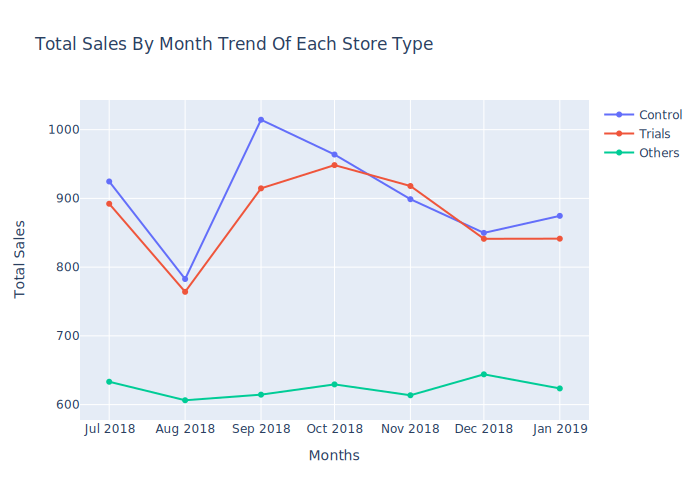

In [83]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=total_sales.month_plot,y=total_sales.Control,mode='lines+markers',name='Control'))
fig.add_trace(go.Scatter(x=total_sales.month_plot,y=total_sales.Trials,mode='lines+markers',name='Trials'))
fig.add_trace(go.Scatter(x=total_sales.month_plot,y=total_sales.Others,mode='lines+markers',name='Others'))

fig.update_layout(title='Total Sales By Month Trend Of Each Store Type',
                  yaxis_title='Total Sales',xaxis_title='Months')

In [84]:
#Creating plot table from the above function base on the number of customers for each store type by month
num_of_customers = plot_creation(sales_df,"num_of_customers","Control","Trials","Others").reset_index()
num_of_customers

,month_plot,Control,Trials,Others
0,2018-07-01,101,99,71.953488
1,2018-08-01,91,94,71.771318
2,2018-09-01,103,103,69.658915
3,2018-10-01,108,109,71.046512
4,2018-11-01,101,100,70.069767
5,2018-12-01,97,98,73.120155
6,2019-01-01,96,94,70.775194


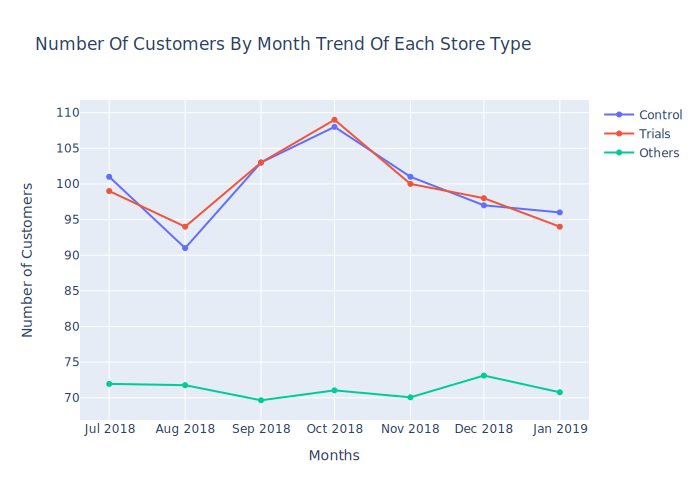

In [85]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=num_of_customers.month_plot,y=num_of_customers.Control,mode='lines+markers',name='Control'))
fig.add_trace(go.Scatter(x=num_of_customers.month_plot,y=num_of_customers.Trials,mode='lines+markers',name='Trials'))
fig.add_trace(go.Scatter(x=num_of_customers.month_plot,y=num_of_customers.Others,mode='lines+markers',name='Others'))

fig.update_layout(title='Number Of Customers By Month Trend Of Each Store Type',
                  yaxis_title='Number of Customers',xaxis_title='Months')

In [86]:
#Applying Function
control_sales_scale,percent_diff = concat_sales_factor(pretrial,"total_sales")
control_sales_scale.head()

,Store_Number,Year_Month,total_sales,num_of_customers,num_of_txn_percustomer,num_of_chips_pertxn,avg_price_perUnit,Month_Plot,month_plot,controlSales
1793,155,201807,924.6,101,1.217822,2.032520,3.698400,2018-07-01,2018-07-01,896.922236
1794,155,201808,782.7,91,1.307692,1.924370,3.417904,2018-08-01,2018-08-01,759.269991
1795,155,201809,1014.4,103,1.398058,2.013889,3.497931,2018-09-01,2018-09-01,984.034086
1796,155,201810,963.8,108,1.259259,2.000000,3.543382,2018-10-01,2018-10-01,934.948790
1797,155,201811,898.8,101,1.316832,2.030075,3.328889,2018-11-01,2018-11-01,871.894555


In [87]:
percent_diff.head()

,Year_Month,controlSales,trialSales,percent_diff
0,201807,896.922236,892.20,0.005265
1,201808,759.269991,764.05,0.006296
2,201809,984.034086,914.60,0.070561
3,201810,934.948790,948.40,0.014387
4,201811,871.894555,918.00,0.052880


In [88]:
std_dev = stdev(percent_diff.loc[percent_diff['Year_Month'] < 201902, 'percent_diff'])
std_dev

0.025833952854772368

In [89]:
#Creating a new column for 'tValue'
#Trial period start from february 2019 to april 2019
#Samples = 7
degree_of_freedom = 6 
percent_diff['t_value'] = (percent_diff['percent_diff'] - 0) / std_dev
percent_diff.loc[(percent_diff['Year_Month'] > 201901) & (percent_diff['Year_Month'] < 201905), ['Year_Month','t_value']]

,Year_Month,t_value
7,201902,2.179542
8,201903,12.226922
9,201904,1.364580


In [90]:
#Getting the 95% of the t-distribution
print(f"The 95% percentile of the t-distribution is {t.ppf(1-0.05,7)}")

The 95% percentile of the t-distribution is 1.894578605061305


In [91]:
#Control store sales
control_store_sales = scale_plot(control_sales_scale,"month_plot","controlSales")
control_store_sales.rename(columns={"controlSales": "control_sales"},inplace=True)
control_store_sales

,control_sales
month_plot,
2018-07-01,896.922236
2018-08-01,759.269991
2018-09-01,984.034086
2018-10-01,934.948790
2018-11-01,871.894555
2018-12-01,824.361363
2019-01-01,848.418979
2019-02-01,864.522060
2019-03-01,780.320405


In [92]:
#Trial store sales
trial_store_sales = metrics_df[metrics_df["Store_Number"] == trial_store] 
trial_store_sales = scale_plot(trial_store_sales,"month_plot","total_sales")
trial_store_sales.rename(columns={"total_sales":"trial_sales"},inplace=True)
trial_store_sales

,trial_sales
month_plot,
2018-07-01,892.20
2018-08-01,764.05
2018-09-01,914.60
2018-10-01,948.40
2018-11-01,918.00
2018-12-01,841.20
2019-01-01,841.40
2019-02-01,913.20
2019-03-01,1026.80


In [93]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval
control_store_sales['control_5percent_confidence_Interval'] = control_store_sales['control_sales'] * (1 - std_dev*2)
control_store_sales['control_95percent_confidence_Interval'] = control_store_sales['control_sales'] * (1 + std_dev*2)
control_store_sales

,control_sales,control_5percent_confidence_Interval,control_95percent_confidence_Interval
month_plot,,,
2018-07-01,896.922236,850.580142,943.264329
2018-08-01,759.269991,720.040101,798.499882
2018-09-01,984.034086,933.191106,1034.877067
2018-10-01,934.948790,886.641944,983.255636
2018-11-01,871.894555,826.845589,916.943521
2018-12-01,824.361363,781.768338,866.954388
2019-01-01,848.418979,804.582947,892.255010
2019-02-01,864.522060,819.854016,909.190104
2019-03-01,780.320405,740.002884,820.637926


In [94]:
control_and_trial_sales = pd.merge(control_store_sales,trial_store_sales,left_index=True,right_index=True).reset_index()
control_and_trial_sales

,month_plot,control_sales,control_5percent_confidence_Interval,control_95percent_confidence_Interval,trial_sales
0,2018-07-01,896.922236,850.580142,943.264329,892.20
1,2018-08-01,759.269991,720.040101,798.499882,764.05
2,2018-09-01,984.034086,933.191106,1034.877067,914.60
3,2018-10-01,934.948790,886.641944,983.255636,948.40
4,2018-11-01,871.894555,826.845589,916.943521,918.00
5,2018-12-01,824.361363,781.768338,866.954388,841.20
6,2019-01-01,848.418979,804.582947,892.255010,841.40
7,2019-02-01,864.522060,819.854016,909.190104,913.20
8,2019-03-01,780.320405,740.002884,820.637926,1026.80
9,2019-04-01,819.317024,776.984629,861.649419,848.20


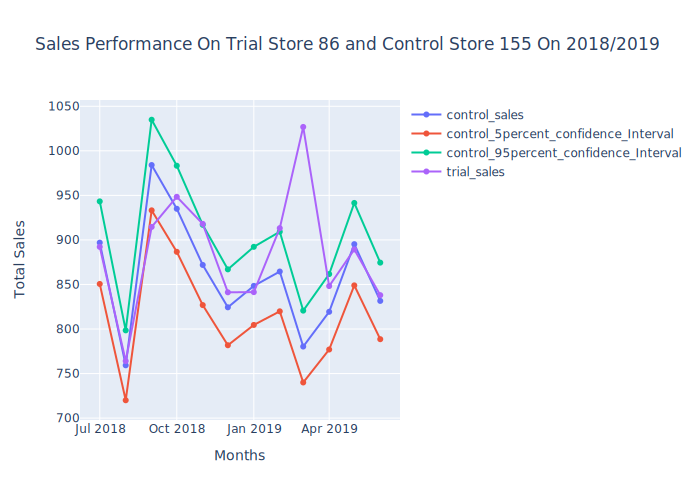

In [95]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=control_and_trial_sales.month_plot,y=control_and_trial_sales.control_sales,mode='lines+markers',name='control_sales'))
fig.add_trace(go.Scatter(x=control_and_trial_sales.month_plot,y=control_and_trial_sales.control_5percent_confidence_Interval,mode='lines+markers',name='control_5percent_confidence_Interval'))
fig.add_trace(go.Scatter(x=control_and_trial_sales.month_plot,y=control_and_trial_sales.control_95percent_confidence_Interval,mode='lines+markers',name='control_95percent_confidence_Interval'))
fig.add_trace(go.Scatter(x=control_and_trial_sales.month_plot,y=control_and_trial_sales.trial_sales,mode='lines+markers',name='trial_sales'))

fig.update_layout(title= f'Sales Performance On Trial Store {trial_store} and Control Store {control_Store} On 2018/2019',
                  yaxis_title='Total Sales',xaxis_title='Months')

In [96]:
#Applying Function
control_cust_scaled,percent_diff = concat_customer_factor(pretrial,"num_of_customers")
percent_diff.head()

,Year_Month,control_customers,num_of_trial_customerst,percent_diff
0,201807,101.0,99,0.019802
1,201808,91.0,94,0.032967
2,201809,103.0,103,0.000000
3,201810,108.0,109,0.009259
4,201811,101.0,100,0.009901


In [97]:
std_dev = stdev(percent_diff.loc[percent_diff['Year_Month'] < 201902, 'percent_diff'])
std_dev

0.010687444701395236

In [98]:
percent_diff['t_value'] = (percent_diff['percent_diff'] - 0) / std_dev
percent_diff.loc[(percent_diff['Year_Month'] > 201901) & (percent_diff['Year_Month'] < 201905), ['Year_Month','t_value']]

,Year_Month,t_value
7,201902,11.819082
8,201903,20.903430
9,201904,5.670772


In [99]:
control_customers = scale_plot(control_cust_scaled,"month_plot","control_customers")
control_customers

,control_customers
month_plot,
2018-07-01,101.0
2018-08-01,91.0
2018-09-01,103.0
2018-10-01,108.0
2018-11-01,101.0
2018-12-01,97.0
2019-01-01,96.0
2019-02-01,95.0
2019-03-01,94.0


In [100]:
trial_customers = metrics_df.loc[metrics_df["Store_Number"] == trial_store]
trial_customers = scale_plot(trial_customers,"month_plot","num_of_customers")
trial_customers.rename(columns={"num_of_customers": "trial_customers"},inplace=True)
trial_customers

,trial_customers
month_plot,
2018-07-01,99
2018-08-01,94
2018-09-01,103
2018-10-01,109
2018-11-01,100
2018-12-01,98
2019-01-01,94
2019-02-01,107
2019-03-01,115


In [101]:
control_customers['control_5percent_confidence_Interval'] = control_customers['control_customers'] * (1 - std_dev * 2)
control_customers['control_95percent_confidence_Interval'] = control_customers['control_customers'] * (1 + std_dev * 2)
control_customers

,control_customers,control_5percent_confidence_Interval,control_95percent_confidence_Interval
month_plot,,,
2018-07-01,101.0,98.841136,103.158864
2018-08-01,91.0,89.054885,92.945115
2018-09-01,103.0,100.798386,105.201614
2018-10-01,108.0,105.691512,110.308488
2018-11-01,101.0,98.841136,103.158864
2018-12-01,97.0,94.926636,99.073364
2019-01-01,96.0,93.948011,98.051989
2019-02-01,95.0,92.969386,97.030614
2019-03-01,94.0,91.990760,96.009240


In [102]:
control_and_trial_customers = pd.merge(control_customers,trial_customers,left_index = True, right_index = True).reset_index()
control_and_trial_customers

,month_plot,control_customers,control_5percent_confidence_Interval,control_95percent_confidence_Interval,trial_customers
0,2018-07-01,101.0,98.841136,103.158864,99
1,2018-08-01,91.0,89.054885,92.945115,94
2,2018-09-01,103.0,100.798386,105.201614,103
3,2018-10-01,108.0,105.691512,110.308488,109
4,2018-11-01,101.0,98.841136,103.158864,100
5,2018-12-01,97.0,94.926636,99.073364,98
6,2019-01-01,96.0,93.948011,98.051989,94
7,2019-02-01,95.0,92.969386,97.030614,107
8,2019-03-01,94.0,91.990760,96.009240,115
9,2019-04-01,99.0,96.883886,101.116114,105


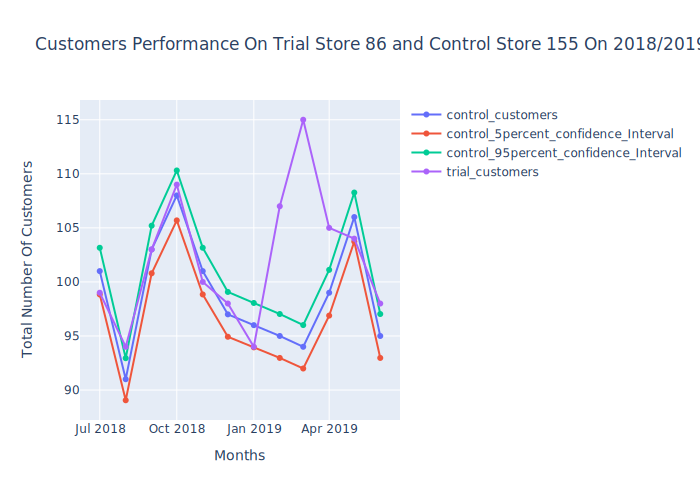

In [103]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=control_and_trial_customers.month_plot,y=control_and_trial_customers.control_customers,mode='lines+markers',name='control_customers'))
fig.add_trace(go.Scatter(x=control_and_trial_customers.month_plot,y=control_and_trial_customers.control_5percent_confidence_Interval,mode='lines+markers',name='control_5percent_confidence_Interval'))
fig.add_trace(go.Scatter(x=control_and_trial_customers.month_plot,y=control_and_trial_customers.control_95percent_confidence_Interval,mode='lines+markers',name='control_95percent_confidence_Interval'))
fig.add_trace(go.Scatter(x=control_and_trial_customers.month_plot,y=control_and_trial_customers.trial_customers,mode='lines+markers',name='trial_customers'))

fig.update_layout(title= f'Customers Performance On Trial Store {trial_store} and Control Store {control_Store} On 2018/2019',
                  yaxis_title='Total Number Of Customers',xaxis_title='Months')

## TRIAL STORE 88 AND CONTROL STORES

In [104]:
#Getting Correlation
trial_store = 88
total_sales_corr = cal_corr("total_sales", trial_store)
num_of_customers = cal_corr('num_of_customers',  trial_store)

total_sales_mag = cal_mag_dist("total_sales", trial_store)
num_of_customers_mag = cal_mag_dist("num_of_customers", trial_store)

In [105]:
total_sales_corr.head()

,trial_store,control_store,Correlation
0,88.0,1.0,0.813636
1,88.0,2.0,-0.067927
2,88.0,3.0,-0.507847
3,88.0,4.0,-0.745566
4,88.0,5.0,0.190330


In [106]:
total_sales_mag.head()

,trial_Store,control_store,Magnitude
0,88.0,1.0,0.548959
1,88.0,2.0,0.541212
2,88.0,3.0,0.458109
3,88.0,4.0,0.484447
4,88.0,5.0,0.496409


In [107]:
#Concatenating the scores together for total_sales
total_sales_score = pd.concat([total_sales_corr, total_sales_mag['Magnitude']], axis = 1)
total_sales_score.head()

,trial_store,control_store,Correlation,Magnitude
0,88.0,1.0,0.813636,0.548959
1,88.0,2.0,-0.067927,0.541212
2,88.0,3.0,-0.507847,0.458109
3,88.0,4.0,-0.745566,0.484447
4,88.0,5.0,0.190330,0.496409


In [108]:
num_of_customers_score = pd.concat([num_of_customers, num_of_customers_mag['Magnitude']], axis = 1)
num_of_customers_score.head()

,trial_store,control_store,Correlation,Magnitude
0,88.0,1.0,0.305334,0.357143
1,88.0,2.0,-0.452379,0.285714
2,88.0,3.0,0.522884,0.683673
3,88.0,4.0,-0.361503,0.577922
4,88.0,5.0,-0.025320,0.558442


In [109]:
#Adding correlated average weight 
corr_weight = 0.5
total_sales_score['total_sales_score'] = corr_weight * total_sales_score['Correlation'] + (1 - corr_weight) * total_sales_score['Magnitude']
total_sales_score.head()

,trial_store,control_store,Correlation,Magnitude,total_sales_score
0,88.0,1.0,0.813636,0.548959,0.681297
1,88.0,2.0,-0.067927,0.541212,0.236643
2,88.0,3.0,-0.507847,0.458109,-0.024869
3,88.0,4.0,-0.745566,0.484447,-0.130559
4,88.0,5.0,0.190330,0.496409,0.343370


In [110]:
#Adding a new column for weighted average
num_of_customers_score['num_of_customers_score'] = corr_weight * num_of_customers_score['Correlation'] + (1 - corr_weight) * num_of_customers_score['Magnitude']
num_of_customers_score.head()

,trial_store,control_store,Correlation,Magnitude,num_of_customers_score
0,88.0,1.0,0.305334,0.357143,0.331238
1,88.0,2.0,-0.452379,0.285714,-0.083332
2,88.0,3.0,0.522884,0.683673,0.603279
3,88.0,4.0,-0.361503,0.577922,0.108210
4,88.0,5.0,-0.025320,0.558442,0.266561


In [111]:
#Setting index both for total sales score and num of customers scores
total_sales_score.set_index(['trial_store', 'control_store'], inplace = True)
num_of_customers_score.set_index(['trial_store', 'control_store'], inplace = True)

In [112]:
control_score = pd.concat([total_sales_score['total_sales_score'], num_of_customers_score['num_of_customers_score']], axis = 1)
control_score.head()

total_sales_score  num_of_customers_score
trial_store control_store                                           
88.0        1.0                     0.681297                0.331238
            2.0                     0.236643               -0.083332
            3.0                    -0.024869                0.603279
            4.0                    -0.130559                0.108210
            5.0                     0.343370                0.266561

In [113]:
#Getting a new column to score control which computes the average of score and sales and score and customers
control_score['control_score_final'] = 0.5 * (control_score['total_sales_score'] + control_score['num_of_customers_score'])
control_score.head()

total_sales_score  num_of_customers_score  \
trial_store control_store                                              
88.0        1.0                     0.681297                0.331238   
            2.0                     0.236643               -0.083332   
            3.0                    -0.024869                0.603279   
            4.0                    -0.130559                0.108210   
            5.0                     0.343370                0.266561   

                           control_score_final  
trial_store control_store                       
88.0        1.0                       0.506268  
            2.0                       0.076655  
            3.0                       0.289205  
            4.0                      -0.011175  
            5.0                       0.304965

In [114]:
#Getting the top 5 stores with highest control score final
final_control_store_top5 = control_score.sort_values("control_score_final",ascending=False)
final_control_store_top5.head()

total_sales_score  num_of_customers_score  \
trial_store control_store                                              
88.0        178.0                   0.650803                0.707828   
            14.0                    0.646064                0.685774   
            134.0                   0.775084                0.540154   
            237.0                   0.451974                0.777235   
            187.0                   0.616752                0.594560   

                           control_score_final  
trial_store control_store                       
88.0        178.0                     0.679316  
            14.0                      0.665919  
            134.0                     0.657619  
            237.0                     0.614604  
            187.0                     0.605656

In [115]:
#Segregating stores into three types, control_store, trial_store and other types
sales_df = pretrial
control_Store = 237
store_type = []
options = {trial_store: "Trials",control_Store: "Control", }

for i in sales_df["Store_Number"]:
    the_thing = options.get(i, "Others")
    store_type.append(the_thing)

sales_df["store_type"] = store_type
sales_df.head()

,Store_Number,Year_Month,total_sales,num_of_customers,num_of_txn_percustomer,num_of_chips_pertxn,avg_price_perUnit,store_type,month_plot
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Others,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Others,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Others,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Others,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Others,2018-11-01


In [116]:
#Creating plot table from the above function base on total sales of each store type by month
total_sales = plot_creation(sales_df,"total_sales","Control","Trials","Others").reset_index()
total_sales

,month_plot,Control,Trials,Others
0,2018-07-01,1448.4,1310.0,629.590310
1,2018-08-01,1367.8,1323.8,601.889341
2,2018-09-01,1322.2,1423.0,611.317054
3,2018-10-01,1348.3,1352.4,626.336047
4,2018-11-01,1397.6,1382.8,609.858527
5,2018-12-01,1265.0,1325.2,640.534884
6,2019-01-01,1219.7,1266.4,620.528682


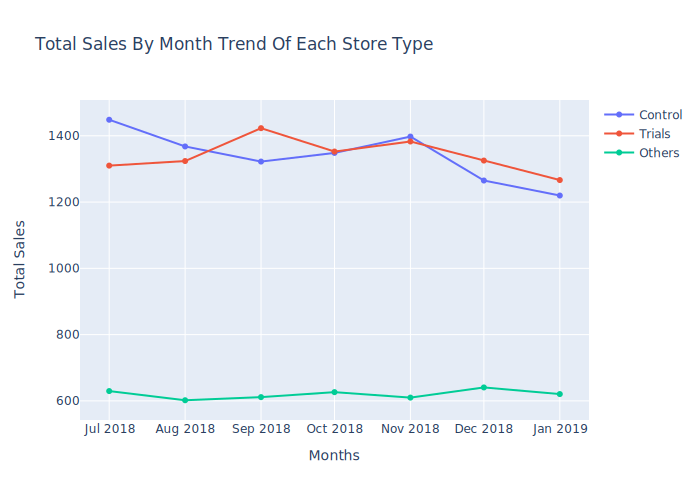

In [117]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=total_sales.month_plot,y=total_sales.Control,mode='lines+markers',name='Control'))
fig.add_trace(go.Scatter(x=total_sales.month_plot,y=total_sales.Trials,mode='lines+markers',name='Trials'))
fig.add_trace(go.Scatter(x=total_sales.month_plot,y=total_sales.Others,mode='lines+markers',name='Others'))

fig.update_layout(title='Total Sales By Month Trend Of Each Store Type',
                  yaxis_title='Total Sales',xaxis_title='Months')

In [118]:
#Creating plot table from the above function base on the number of customers for each store type by month
num_of_customers = plot_creation(sales_df,"num_of_customers","Control","Trials","Others").reset_index()
num_of_customers

,month_plot,Control,Trials,Others
0,2018-07-01,128,129,71.732558
1,2018-08-01,135,131,71.457364
2,2018-09-01,126,124,69.488372
3,2018-10-01,123,123,70.934109
4,2018-11-01,132,130,69.833333
5,2018-12-01,124,126,72.906977
6,2019-01-01,117,117,70.604651


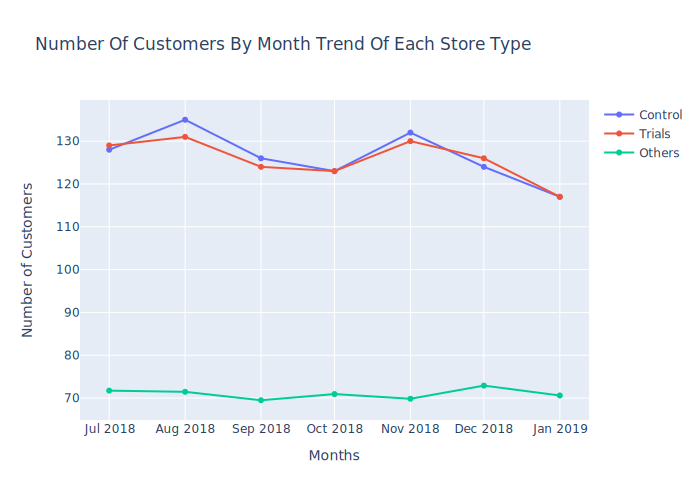

In [119]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=num_of_customers.month_plot,y=num_of_customers.Control,mode='lines+markers',name='Control'))
fig.add_trace(go.Scatter(x=num_of_customers.month_plot,y=num_of_customers.Trials,mode='lines+markers',name='Trials'))
fig.add_trace(go.Scatter(x=num_of_customers.month_plot,y=num_of_customers.Others,mode='lines+markers',name='Others'))

fig.update_layout(title='Number Of Customers By Month Trend Of Each Store Type',
                  yaxis_title='Number of Customers',xaxis_title='Months')

In [120]:
#Applying Function
control_sales_scale,percent_diff = concat_sales_factor(pretrial,"total_sales")
control_sales_scale.head()

,Store_Number,Year_Month,total_sales,num_of_customers,num_of_txn_percustomer,num_of_chips_pertxn,avg_price_perUnit,Month_Plot,month_plot,controlSales
2747,237,201807,1448.4,128,1.265625,2.000000,4.470370,2018-07-01,2018-07-01,1450.657086
2748,237,201808,1367.8,135,1.222222,1.896970,4.369968,2018-08-01,2018-08-01,1369.931485
2749,237,201809,1322.2,126,1.182540,2.006711,4.422074,2018-09-01,2018-09-01,1324.260425
2750,237,201810,1348.3,123,1.195122,2.034014,4.509365,2018-10-01,2018-10-01,1350.401097
2751,237,201811,1397.6,132,1.219697,1.987578,4.367500,2018-11-01,2018-11-01,1399.777923


In [121]:
percent_diff.head()

,Year_Month,controlSales,trialSales,percent_diff
0,201807,1450.657086,1310.0,0.096961
1,201808,1369.931485,1323.8,0.033674
2,201809,1324.260425,1423.0,0.074562
3,201810,1350.401097,1352.4,0.001480
4,201811,1399.777923,1382.8,0.012129


In [122]:
std_dev = stdev(percent_diff.loc[percent_diff['Year_Month'] < 201902, 'percent_diff'])
std_dev

0.0334678673030788

In [123]:
#Creating a new column for 'tValue'
#Trial period start from february 2019 to april 2019
#Samples = 7
degree_of_freedom = 6 
percent_diff['t_value'] = (percent_diff['percent_diff'] - 0) / std_dev
percent_diff.loc[(percent_diff['Year_Month'] > 201901) & (percent_diff['Year_Month'] < 201905), ['Year_Month','t_value']]

,Year_Month,t_value
7,201902,0.781270
8,201903,6.595668
9,201904,5.768527


In [124]:
#Getting the 95% of the t-distribution
print(f"The 95% percentile of the t-distribution is {t.ppf(1-0.05,7)}")

The 95% percentile of the t-distribution is 1.894578605061305


In [125]:
#Control store sales
control_store_sales = scale_plot(control_sales_scale,"month_plot","controlSales")
control_store_sales.rename(columns={"controlSales": "control_sales"},inplace=True)
control_store_sales

,control_sales
month_plot,
2018-07-01,1450.657086
2018-08-01,1369.931485
2018-09-01,1324.260425
2018-10-01,1350.401097
2018-11-01,1399.777923
2018-12-01,1266.971288
2019-01-01,1221.600696
2019-02-01,1406.989143
2019-03-01,1210.082775


In [126]:
#Trial store sales
trial_store_sales = metrics_df[metrics_df["Store_Number"] == trial_store] 
trial_store_sales = scale_plot(trial_store_sales,"month_plot","total_sales")
trial_store_sales.rename(columns={"total_sales":"trial_sales"},inplace=True)
trial_store_sales

,trial_sales
month_plot,
2018-07-01,1310.00
2018-08-01,1323.80
2018-09-01,1423.00
2018-10-01,1352.40
2018-11-01,1382.80
2018-12-01,1325.20
2019-01-01,1266.40
2019-02-01,1370.20
2019-03-01,1477.20


In [127]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval
control_store_sales['control_5percent_confidence_Interval'] = control_store_sales['control_sales'] * (1 - std_dev*2)
control_store_sales['control_95percent_confidence_Interval'] = control_store_sales['control_sales'] * (1 + std_dev*2)
control_store_sales

,control_sales,control_5percent_confidence_Interval,control_95percent_confidence_Interval
month_plot,,,
2018-07-01,1450.657086,1353.556288,1547.757884
2018-08-01,1369.931485,1278.234114,1461.628855
2018-09-01,1324.260425,1235.620080,1412.900769
2018-10-01,1350.401097,1260.011008,1440.791187
2018-11-01,1399.777923,1306.082759,1493.473086
2018-12-01,1266.971288,1182.165634,1351.776942
2019-01-01,1221.600696,1139.831956,1303.369436
2019-02-01,1406.989143,1312.811291,1501.166995
2019-03-01,1210.082775,1129.084996,1291.080555


In [128]:
control_and_trial_sales = pd.merge(control_store_sales,trial_store_sales,left_index=True,right_index=True).reset_index()
control_and_trial_sales

,month_plot,control_sales,control_5percent_confidence_Interval,control_95percent_confidence_Interval,trial_sales
0,2018-07-01,1450.657086,1353.556288,1547.757884,1310.00
1,2018-08-01,1369.931485,1278.234114,1461.628855,1323.80
2,2018-09-01,1324.260425,1235.620080,1412.900769,1423.00
3,2018-10-01,1350.401097,1260.011008,1440.791187,1352.40
4,2018-11-01,1399.777923,1306.082759,1493.473086,1382.80
5,2018-12-01,1266.971288,1182.165634,1351.776942,1325.20
6,2019-01-01,1221.600696,1139.831956,1303.369436,1266.40
7,2019-02-01,1406.989143,1312.811291,1501.166995,1370.20
8,2019-03-01,1210.082775,1129.084996,1291.080555,1477.20
9,2019-04-01,1206.477165,1125.720730,1287.233600,1439.40


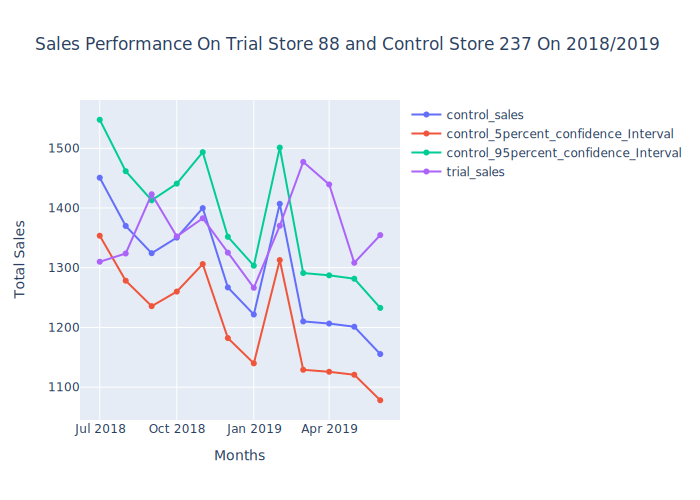

In [129]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=control_and_trial_sales.month_plot,y=control_and_trial_sales.control_sales,mode='lines+markers',name='control_sales'))
fig.add_trace(go.Scatter(x=control_and_trial_sales.month_plot,y=control_and_trial_sales.control_5percent_confidence_Interval,mode='lines+markers',name='control_5percent_confidence_Interval'))
fig.add_trace(go.Scatter(x=control_and_trial_sales.month_plot,y=control_and_trial_sales.control_95percent_confidence_Interval,mode='lines+markers',name='control_95percent_confidence_Interval'))
fig.add_trace(go.Scatter(x=control_and_trial_sales.month_plot,y=control_and_trial_sales.trial_sales,mode='lines+markers',name='trial_sales'))

fig.update_layout(title= f'Sales Performance On Trial Store {trial_store} and Control Store {control_Store} On 2018/2019',
                  yaxis_title='Total Sales',xaxis_title='Months')

For total sales, we can see that the trial for 88 is significantly different compared to control store on the March and April but not statistically different for February. Trial store performance lies outsidde 5% to 95%.

In [130]:
#Applying Function
control_cust_scaled,percent_diff = concat_customer_factor(pretrial,"num_of_customers")
percent_diff.head()

,Year_Month,control_customers,num_of_trial_customerst,percent_diff
0,201807,127.276836,129,0.013539
1,201808,134.237288,131,0.024116
2,201809,125.288136,124,0.010281
3,201810,122.305085,123,0.005682
4,201811,131.254237,130,0.009556


In [131]:
std_dev = stdev(percent_diff.loc[percent_diff['Year_Month'] < 201902, 'percent_diff'])
std_dev

0.00741024435207507

In [132]:
percent_diff['t_value'] = (percent_diff['percent_diff'] - 0) / std_dev
percent_diff.loc[(percent_diff['Year_Month'] > 201901) & (percent_diff['Year_Month'] < 201905), ['Year_Month','t_value']]

,Year_Month,t_value
7,201902,1.387456
8,201903,17.873693
9,201904,9.814423


In [133]:
control_customers = scale_plot(control_cust_scaled,"month_plot","control_customers")
control_customers

,control_customers
month_plot,
2018-07-01,127.276836
2018-08-01,134.237288
2018-09-01,125.288136
2018-10-01,122.305085
2018-11-01,131.254237
2018-12-01,123.299435
2019-01-01,116.338983
2019-02-01,125.288136
2019-03-01,118.327684


In [134]:
trial_customers = metrics_df.loc[metrics_df["Store_Number"] == trial_store]
trial_customers = scale_plot(trial_customers,"month_plot","num_of_customers")
trial_customers.rename(columns={"num_of_customers": "trial_customers"},inplace=True)
trial_customers

,trial_customers
month_plot,
2018-07-01,129
2018-08-01,131
2018-09-01,124
2018-10-01,123
2018-11-01,130
2018-12-01,126
2019-01-01,117
2019-02-01,124
2019-03-01,134


In [135]:
control_customers['control_5percent_confidence_Interval'] = control_customers['control_customers'] * (1 - std_dev * 2)
control_customers['control_95percent_confidence_Interval'] = control_customers['control_customers'] * (1 + std_dev * 2)
control_customers

,control_customers,control_5percent_confidence_Interval,control_95percent_confidence_Interval
month_plot,,,
2018-07-01,127.276836,125.390531,129.163141
2018-08-01,134.237288,132.247826,136.226750
2018-09-01,125.288136,123.431304,127.144967
2018-10-01,122.305085,120.492464,124.117706
2018-11-01,131.254237,129.308985,133.199489
2018-12-01,123.299435,121.472077,125.126793
2019-01-01,116.338983,114.614782,118.063184
2019-02-01,125.288136,123.431304,127.144967
2019-03-01,118.327684,116.574010,120.081358


In [136]:
control_and_trial_customers = pd.merge(control_customers,trial_customers,left_index = True, right_index = True).reset_index()
control_and_trial_customers

,month_plot,control_customers,control_5percent_confidence_Interval,control_95percent_confidence_Interval,trial_customers
0,2018-07-01,127.276836,125.390531,129.163141,129
1,2018-08-01,134.237288,132.247826,136.226750,131
2,2018-09-01,125.288136,123.431304,127.144967,124
3,2018-10-01,122.305085,120.492464,124.117706,123
4,2018-11-01,131.254237,129.308985,133.199489,130
5,2018-12-01,123.299435,121.472077,125.126793,126
6,2019-01-01,116.338983,114.614782,118.063184,117
7,2019-02-01,125.288136,123.431304,127.144967,124
8,2019-03-01,118.327684,116.574010,120.081358,134
9,2019-04-01,119.322034,117.553623,121.090445,128


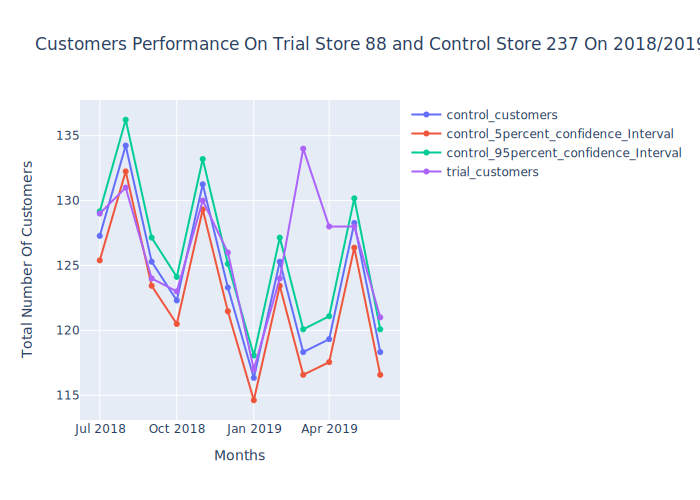

In [137]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=control_and_trial_customers.month_plot,y=control_and_trial_customers.control_customers,mode='lines+markers',name='control_customers'))
fig.add_trace(go.Scatter(x=control_and_trial_customers.month_plot,y=control_and_trial_customers.control_5percent_confidence_Interval,mode='lines+markers',name='control_5percent_confidence_Interval'))
fig.add_trace(go.Scatter(x=control_and_trial_customers.month_plot,y=control_and_trial_customers.control_95percent_confidence_Interval,mode='lines+markers',name='control_95percent_confidence_Interval'))
fig.add_trace(go.Scatter(x=control_and_trial_customers.month_plot,y=control_and_trial_customers.trial_customers,mode='lines+markers',name='trial_customers'))

fig.update_layout(title= f'Customers Performance On Trial Store {trial_store} and Control Store {control_Store} On 2018/2019',
                  yaxis_title='Total Number Of Customers',xaxis_title='Months')

Total number of customers in the trial period for the trial store is significantly higher than the control store for two out of three months, which indicates a positive trial effect.

## CONCLUSION
We've found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.<br>
The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the three trial months but this is not the case for 
trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in 
sales.